In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/saniasinha/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dapi = pd.read_csv("eval_DAPI_whitescan.csv")
dapi = dapi.drop(columns = ["Unnamed: 0"], axis = 1)
dapi

,file,mse,ssim,pearson
0,14_prediction_c0.jpeg,19.842988,0.219706,-0.049337
1,103_prediction_c0.jpeg,35.094856,0.885976,0.235940
2,74_prediction_c0.jpeg,29.822287,0.846820,0.241735
3,27_prediction_c0.jpeg,5.010211,0.531475,0.199202
4,116_prediction_c0.jpeg,77.644221,0.897344,0.206484
5,76_prediction_c0.jpeg,19.302423,0.924641,0.057307
6,63_prediction_c0.jpeg,80.814279,0.900002,0.294708
7,71_prediction_c0.jpeg,2.423075,0.320019,-0.069682
8,55_prediction_c0.jpeg,8.020585,0.572417,0.039528
9,119_prediction_c0.jpeg,5.112535,0.670535,0.165573


In [3]:
pax = pd.read_csv("eval_Pax7.csv")
pax = pax.drop(columns = ["Unnamed: 0"], axis = 1)
pax

,file,mse,ssim,pearson
0,142_prediction_c0.jpeg,37.401319,0.019971,0.035729
1,13_prediction_c0.jpeg,18.427002,0.016834,0.004728
2,29_prediction_c0.jpeg,22.191855,0.015627,0.019978
3,139_prediction_c0.jpeg,16.371924,0.020308,0.013875
4,79_prediction_c0.jpeg,21.747322,0.017059,0.016170
...,...,...,...,...
110,42_prediction_c0.jpeg,21.690126,0.013291,0.011036
111,62_prediction_c0.jpeg,20.878623,0.012049,0.011498
112,34_prediction_c0.jpeg,14.304492,0.019066,0.013565
113,19_prediction_c0.jpeg,29.561566,0.013427,0.018373


In [4]:
mask = [file in dapi["file"].values for file in pax["file"].values]
mask

[False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False]

In [5]:
pax = pax[mask]

In [6]:
mask2 = [file in pax["file"].values for file in dapi["file"].values]
mask2

[True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True]

In [7]:
dapi = dapi[mask2]

In [8]:
pax = pax.reset_index()

In [9]:
dapi = dapi.reset_index()

In [10]:
pax

,index,file,mse,ssim,pearson
0,5,14_prediction_c0.jpeg,12.467450,0.027633,0.003839
1,9,103_prediction_c0.jpeg,21.862431,0.014876,0.012001
2,17,116_prediction_c0.jpeg,21.394311,0.012108,0.010584
3,29,76_prediction_c0.jpeg,23.982612,0.020679,0.006737
4,33,63_prediction_c0.jpeg,22.661403,0.027454,0.039271
5,40,71_prediction_c0.jpeg,19.662971,0.011506,0.005323
6,47,55_prediction_c0.jpeg,25.670833,0.014443,0.013040
7,49,127_prediction_c0.jpeg,17.760478,0.011502,0.007995
8,52,114_prediction_c0.jpeg,18.340543,0.010112,0.004056
9,53,100_prediction_c0.jpeg,28.638660,0.021725,0.014986


In [11]:
dapi

,index,file,mse,ssim,pearson
0,0,14_prediction_c0.jpeg,19.842988,0.219706,-0.049337
1,1,103_prediction_c0.jpeg,35.094856,0.885976,0.235940
2,4,116_prediction_c0.jpeg,77.644221,0.897344,0.206484
3,5,76_prediction_c0.jpeg,19.302423,0.924641,0.057307
4,6,63_prediction_c0.jpeg,80.814279,0.900002,0.294708
5,7,71_prediction_c0.jpeg,2.423075,0.320019,-0.069682
6,8,55_prediction_c0.jpeg,8.020585,0.572417,0.039528
7,10,127_prediction_c0.jpeg,1.742630,0.220725,-0.078191
8,11,114_prediction_c0.jpeg,113.494723,0.915360,0.252508
9,12,100_prediction_c0.jpeg,1.419266,0.394412,0.003184


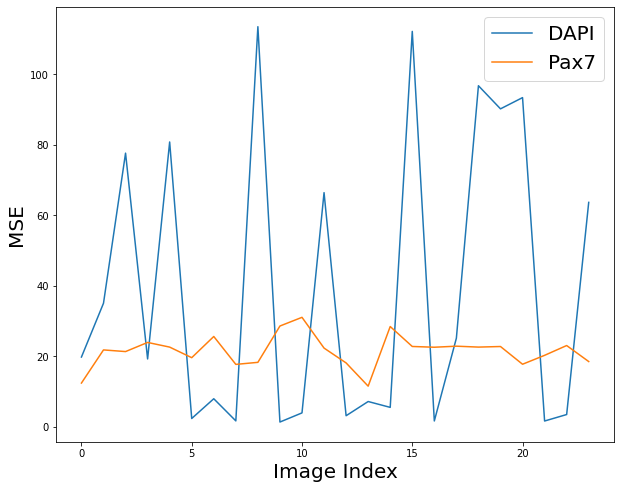

In [12]:
plt.figure(figsize = (10,8))
plt.plot(dapi["mse"], label = "DAPI")
plt.plot(pax["mse"], label = "Pax7")
plt.xlabel("Image Index", fontsize=20)
plt.ylabel("MSE", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("mse_comparison.png")

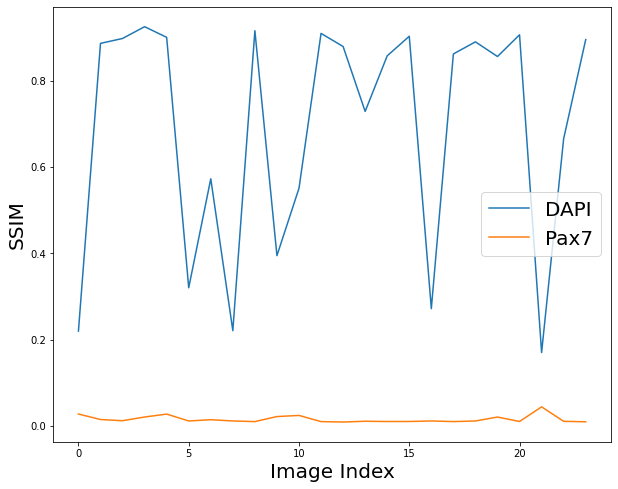

In [13]:
plt.figure(figsize = (10,8))
plt.plot(dapi["ssim"], label = "DAPI")
plt.plot(pax["ssim"], label = "Pax7")
plt.xlabel("Image Index", fontsize=20)
plt.ylabel("SSIM", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("ssim_comparison.png")

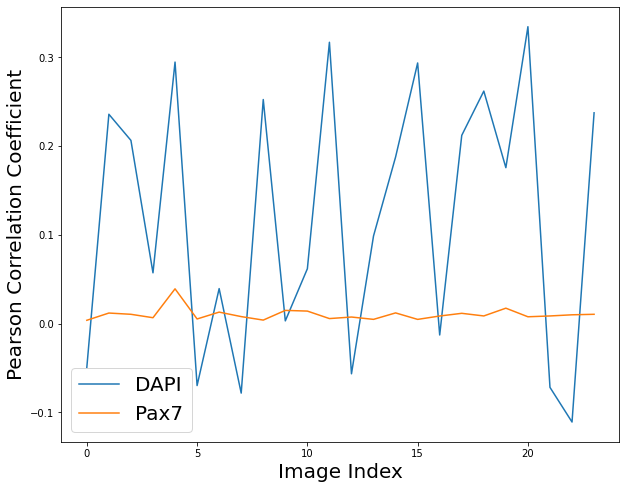

In [14]:
plt.figure(figsize = (10,8))
plt.plot(dapi["pearson"], label = "DAPI")
plt.plot(pax["pearson"], label = "Pax7")
plt.xlabel("Image Index", fontsize=20)
plt.ylabel("Pearson Correlation Coefficient", fontsize=20)
plt.legend(fontsize=20)
plt.savefig("pearson_comparison.png")